In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib


In [2]:

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

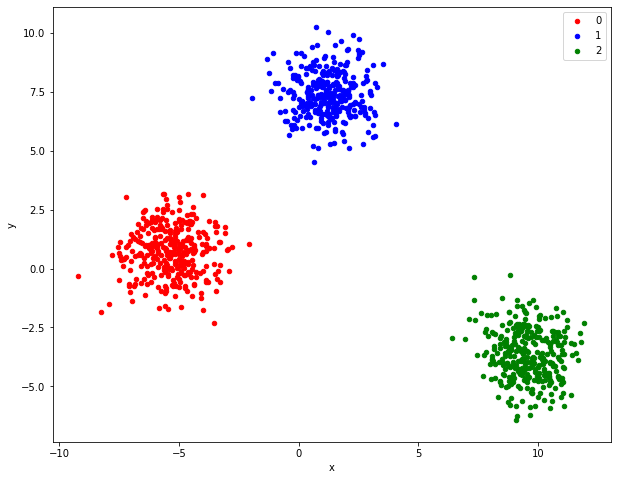

Text(0.5, 1.0, 'Logistic Regression')

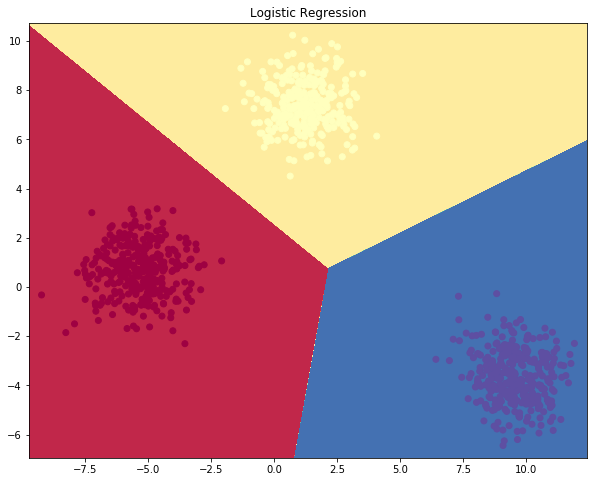

In [4]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
clf = sklearn.linear_model.LogisticRegressionCV()

X, y = make_blobs(n_samples=1000, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
clf.fit(X, y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [5]:
# Train the logistic regression classifier
lr = sklearn.linear_model.LogisticRegressionCV()


In [6]:
lr.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
y_pred = lr.predict(X)

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[334,   0,   0],
       [  0, 333,   0],
       [  0,   0, 333]])

In [9]:
confusion_matrix(y, y_pred).ravel()

array([334,   0,   0,   0, 333,   0,   0,   0, 333])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

Text(0.5, 1.0, 'Logistic Regression')

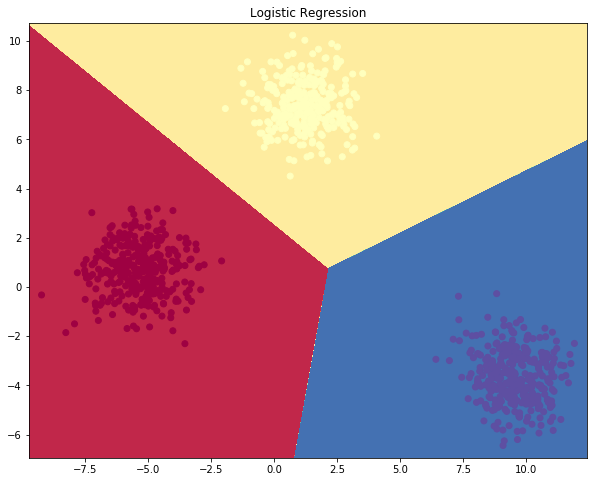

In [11]:
# Plot the decision boundary
plot_decision_boundary(lambda x: lr.predict(x))
plt.title("Logistic Regression")